### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 - 4) Fractional Brownian Motion Realization
 
 ---

# Generate Training Data

In [1]:
# First Round Initializations (Global Level) #
#============================================#
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Using TensorFlow backend.


Parameter Grids Build and Loaded!
Complete NEU-Structure Building Procedure!!!
Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN (Fully Coupled) Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


### Fix Seeds for Reproducability

In [2]:
# Numpy
np.random.seed(2020)
# Tensorflow
tf.random.set_seed(2020)
# Python's Seed
random.seed(2020)

When generating data...you may use one of the following options:
- For evaluating non-localy patterns: "nonlocality"
- For evaluating model performance when faced with non-stationary osculatory behaviour: "oscilatory"
- For evaluating jump-type performance when faced with a discontinuity: "jumpdiscontinuity"
- For fun/debugging/sanity checking: "the_nightmare"

Simulation Confiugration Information:
 
We're plotting the function: the_nightmare with 0.25 additive noise, a distortion/model uncertainty level of 0.25, and an out-of sample window on either side of the input space of: 0.001.  We train using 1000 datapoints and have a test set conisting of 0.75% percent of the total generated data.
 
(250, 1)
(250, 1)
(250,)
 
(750, 1)
(750, 1)
(750,)


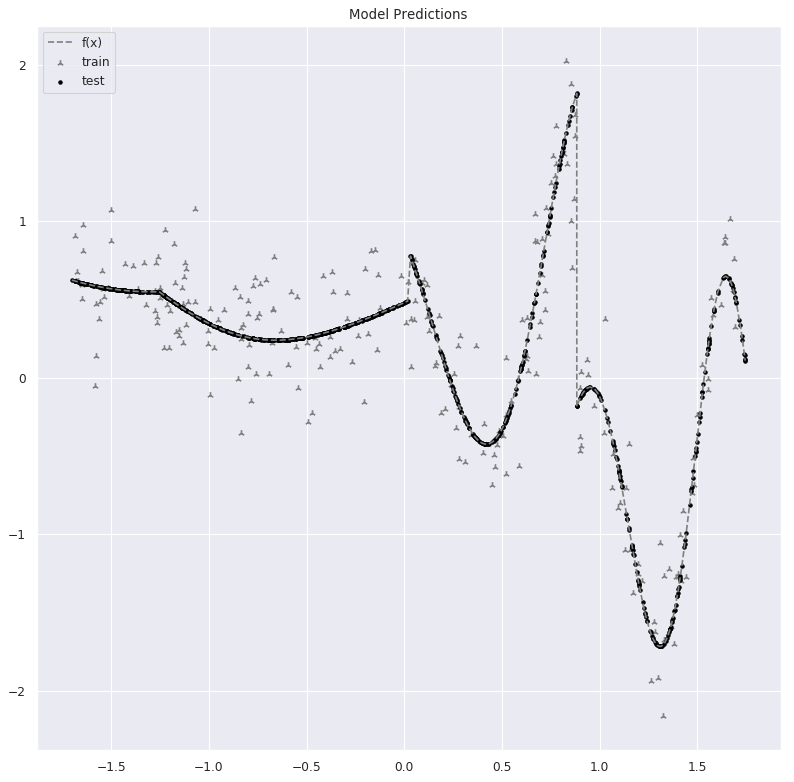

In [3]:
#------------------------#
# Run External Notebooks #
#------------------------#
# %run Data_Generator.ipynb
exec(open('Data_Generator.py').read())

**TEMP:**

Data Driven Robustness Rule:
Using [this article](https://www.sciencedirect.com/science/article/pii/S0378375815000403) for the variance estimate.  
$$
\hat{\sigma}^2 \triangleq
\frac1{(n-1)}\sum_{1<n\leq N} (y_n - y_{n-1})^2
.
$$

We couple it to the problem via the following
$$
\underset{\underset{0\leq w_n\leq 1}{\sum_{n\leq N} w_n=1}}{\operatorname{argmax}} \sum_{n\leq N} w_n L(f(x_n),\hat{f}(x_n),x_n) - \sigma^2 \sum_{n\leq N} w_n \ln\left(\frac{w_n}{N}\right)
.
$$

In [4]:
# GET STATISTICAL VARIANCE ESTIMATE
var_estimate = np.sum(np.diff(data_y)**2)/(((data_y.shape[0])-1))
var_estimate = np.float(round(var_estimate,3))


robustness_dictionary = {'robustness_parameter': [var_estimate*factor,var_estimate*2*factor,var_estimate*3*factor]}
#==================================================================================#        
### Create NEU parameter disctionary by parameters joining model it is upgrading ###
#==================================================================================#
param_grid_NEU_Nets = {**param_grid_NEU_Nets,
                       **robustness_dictionary}

param_grid_NEU_Feature_Only_Nets = {**param_grid_NEU_Feature_Only_Nets,
                                    **robustness_dictionary}

NEU_Structure_Dictionary = {**NEU_Structure_Dictionary,
                            **robustness_dictionary}

# NEU OLS Keys
param_grid_NEU_Reg_Nets = {**param_grid_NEU_Nets,
                           **robustness_dictionary}

param_grid_NEU_Reg_Nets.pop('height', None)
param_grid_NEU_Reg_Nets.pop('depth', None)
print(" ")

# Benchmark Models

Run univariate regression benchmarks file:

In [5]:
# %run Univariate_Regression_Benchmark_Models.ipynb
exec(open('Univariate_Regression_Benchmark_Models.py').read())

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Batch computation too fast (0.1680s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    4.5s finished


Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5646 - mse: 0.5180 - mae: 0.5646 - mape: 104.7029
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5607 - mse: 0.5150 - mae: 0.5607 - mape: 106.0756
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5567 - mse: 0.5117 - mae: 0.5567 - mape: 106.6160
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5520 - mse: 0.5077 - mae: 0.5520 - mape: 108.4438
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5467 - mse: 0.5031 - mae: 0.5467 - mape: 110.4861
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5405 - mse: 0.4975 - mae: 0.5405 - mape: 111.2494
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5331 - mse: 0.4918 - mae: 0.5331 - mape: 114.0154
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.5235 - mse: 0.4845 - mae: 0.5235 - mape: 115.2961
Epoch 9/

---
# Train Feature Map for "decoupled" NEU-*Model(s)*
---

We train NEU's universal linearizing feature map.

In [6]:
tf.random.set_seed(2020)

start = time.time()
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Obtain NEU-OLS predictions and Model
NEU_OLS_y_hat_train_pre, NEU_OLS_y_hat_test_pre, NEU_OLS = build_NEU_OLS(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Feature_Only_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)
# Extract Linearizing Feature Map
Linearizing_Feature_Map = extract_trained_feature_map(NEU_OLS.model)

# Pre-process Linearized Data #
#========================b=====#
# Get Linearized Predictions #
#----------------------------#
data_x_featured_train = Linearizing_Feature_Map.predict(data_x)
data_x_featured_test = Linearizing_Feature_Map.predict(data_x_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,data_x.reshape(-1,D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,data_x_test.reshape(-1,D)],axis=1)


# Extract Feature Data Only (for De-coupled Implementations of Step 2) #
#----------------------------------------------------------------------#
data_x_NEU_train_feature_only = data_x_NEU_train[:,:d]
data_x_NEU_test_feature_only = data_x_NEU_test[:,:d]

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.5s finished


Epoch 1/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6640 - mse: 0.5608 - mae: 0.6008 - mape: 112.7765
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6670 - mse: 0.5604 - mae: 0.6004 - mape: 112.5737
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6608 - mse: 0.5600 - mae: 0.6001 - mape: 112.4811
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6642 - mse: 0.5596 - mae: 0.5997 - mape: 112.2919
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6622 - mse: 0.5591 - mae: 0.5993 - mape: 112.1152
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6617 - mse: 0.5587 - mae: 0.5990 - mape: 111.9837
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6623 - mse: 0.5583 - mae: 0.5986 - mape: 111.7853
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6602 - mse: 0.5579 - mae: 0.5982 - mape: 111.6545
Epoch 9/

## Chaining Phase

In [27]:
data_x_featured_train, data_x_featured_test, Linearizing_Feature_Map = get_NEU_Feature_Chaining(learning_rate=0.0001, 
                                                                                                X_train_in=data_x_NEU_train,
                                                                                                X_test_in = data_x_NEU_test,
                                                                                                y_train_in = data_y,
                                                                                                block_depth = 1, 
                                                                                                feature_map_height = 1,
                                                                                                robustness_parameter = 0.001, 
                                                                                                homotopy_parameter = 0,
                                                                                                N_epochs = 10,
                                                                                                batch_size = 8,
                                                                                                output_dim=1)

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5611 - mse: 0.5032 - mae: 0.5609 - mape: 106.1651
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5536 - mse: 0.4961 - mae: 0.5534 - mape: 106.5506
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5454 - mse: 0.4884 - mae: 0.5453 - mape: 105.3478
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5366 - mse: 0.4800 - mae: 0.5364 - mape: 106.7124
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5271 - mse: 0.4715 - mae: 0.5269 - mape: 108.9899
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5166 - mse: 0.4626 - mae: 0.5164 - mape: 109.0313
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5052 - mse: 0.4535 - mae: 0.5050 - mape: 112.5671
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4931 - mse: 0.4446 - mae: 0.4929 - mape: 115.1570
Epoch 9/

---
# Linear Model(s)
---

### NEU-Linear *(decoupled implementation)*

In [28]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
#====================================#
# Ordinary Linear Regression Version #
#====================================#
NEU_lin_reg = LinearRegression()
NEU_lin_reg.fit(data_x_featured_train,data_y)
NEU_OLS_train = NEU_lin_reg.predict(data_x_featured_train)
NEU_OLS_test = NEU_lin_reg.predict(data_x_featured_test)

#=====================#
# Elastic Net Version #
#=====================#
# Block warnings that spam when performing coordinate descent (by default) in 1-d.
import warnings
warnings.filterwarnings("ignore")
# Initialize Elastic Net Regularization Model
if trial_run == True: # Fast version for trial
    NEU_lin_reg = ElasticNetCV(cv=5, 
                               random_state=0, 
                               alphas = np.linspace(0,(10**2),5),
                               l1_ratio = np.linspace(0,1,5))
else: #Slow Version for real-deal
    NEU_lin_reg = ElasticNetCV(cv=5, 
                               random_state=0, 
                               alphas = np.linspace(0,(10**2),(10**2)),
                               l1_ratio=np.linspace(0,1,(10**2)))
# Fit Elastic Net Model
NEU_lin_reg.fit(data_x_featured_train,data_y)

ElasticNetCV(alphas=array([  0.,  25.,  50.,  75., 100.]), copy_X=True, cv=5,
             eps=0.001, fit_intercept=True,
             l1_ratio=array([0.  , 0.25, 0.5 , 0.75, 1.  ]), max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
             verbose=0)

In [29]:
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Produce Prediction(s)
NEU_OLS_y_hat_train = NEU_lin_reg.predict(data_x_featured_train)
NEU_OLS_y_hat_test = NEU_lin_reg.predict(data_x_featured_test)

NEU_OLS_y_hat_train_FC = NEU_OLS_train
NEU_OLS_y_hat_test_FC = NEU_OLS_test

end = time.time()

#### Visualization of Feature Space


Embedding Dimension: 12


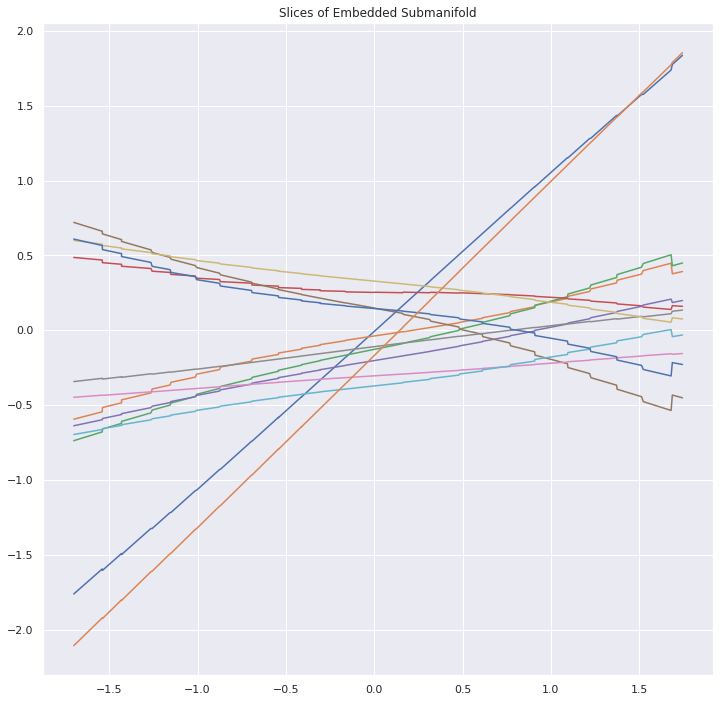

In [30]:
print()
Embedding = pd.DataFrame(data_x_featured_test,index=data_x_test.reshape(-1,), columns=range(0,data_x_featured_test.shape[1]))
# Format Plot #
#-------------#
fig = Embedding.plot(figsize=(12, 12))
fig.get_legend().remove()
plt.title("Slices of Embedded Submanifold")
print("Embedding Dimension: "+str(data_x_featured_test.shape[1]))

# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Sliced_Manifold_Embedding_with_N_Dimensions_'+str(data_x_featured_test.shape[1])+'.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

#### Visual Comaprison between the OLS and the NEU-OLS models:

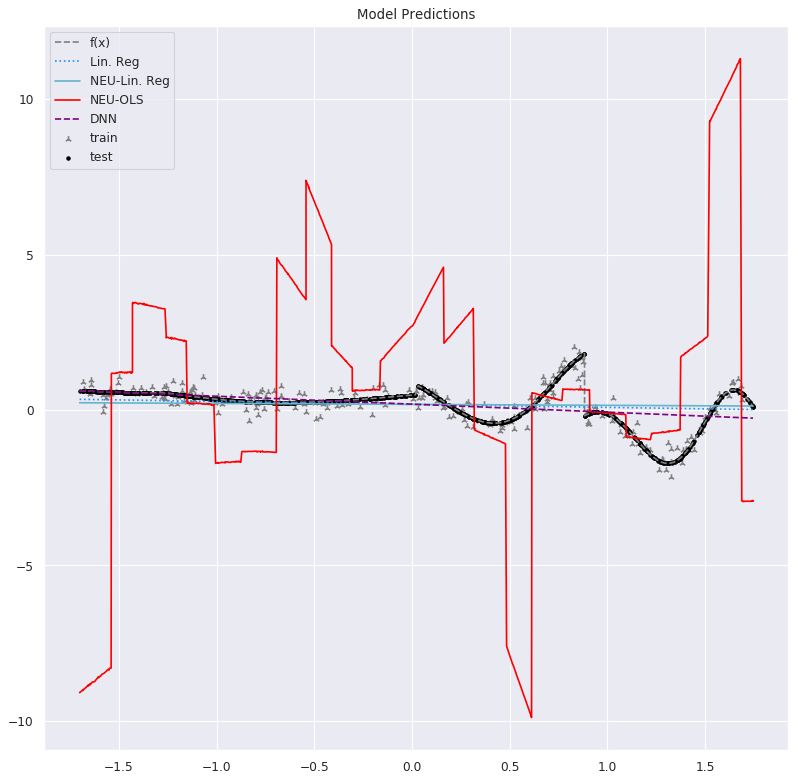

In [31]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')

# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU-Lin. Reg')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test_FC, color = 'red',label='NEU-OLS')
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'purple',linestyle="--",  label='DNN')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/OLS.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

#### Error Distribution NEU-OLS

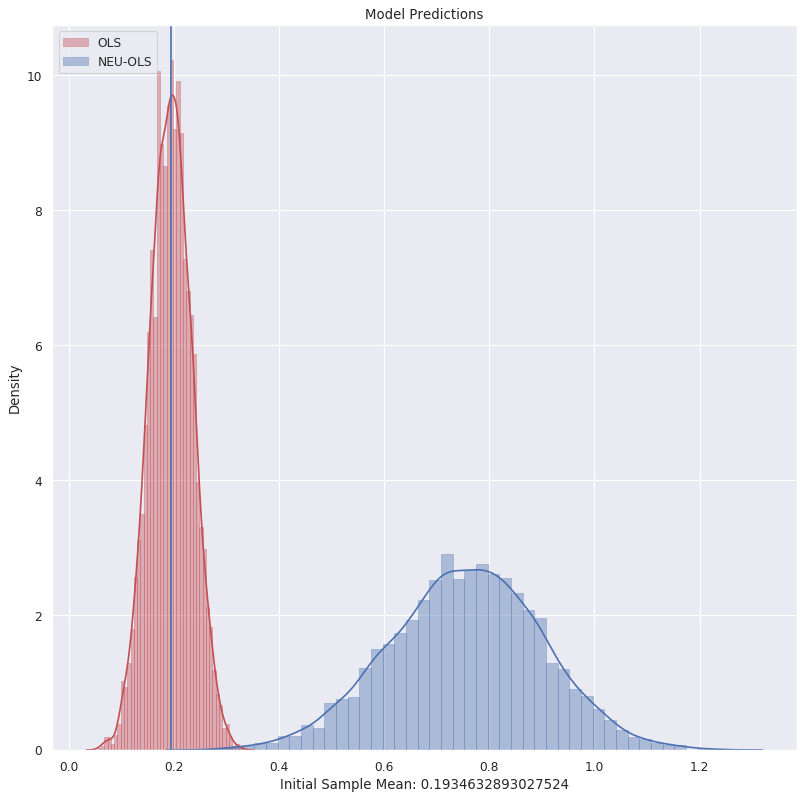

In [32]:
get_Error_distribution_plots(data_y_test,ENET_OLS_y_hat_test,NEU_OLS_y_hat_test_FC,"OLS")

#### Error Distribution NEU-ENET

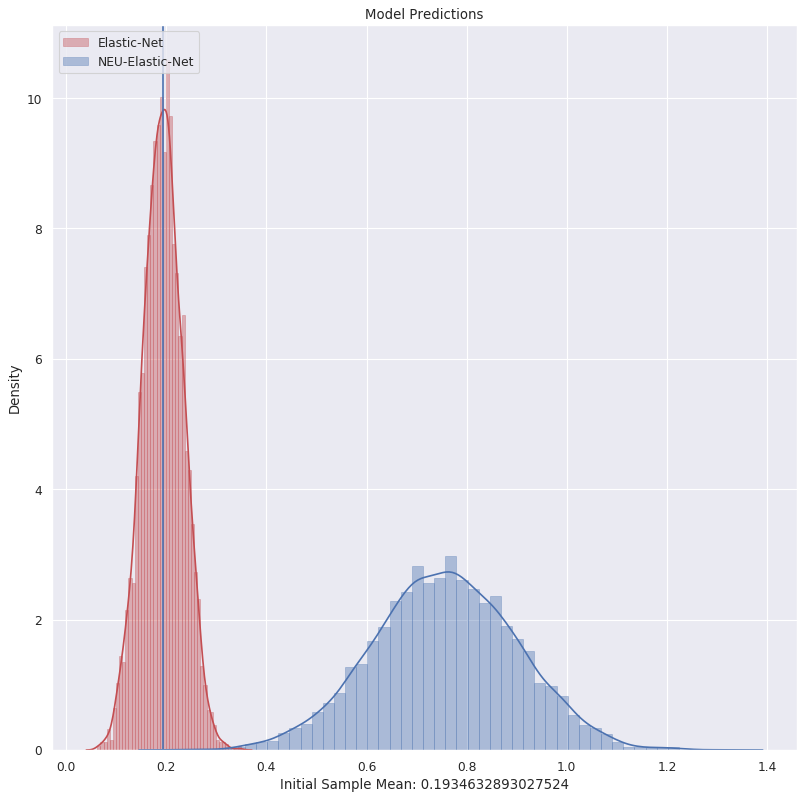

In [33]:
get_Error_distribution_plots(data_y_test,ENET_OLS_y_hat_test,NEU_OLS_y_hat_test_FC,"Elastic-Net")

#### Comparison between Elastic-Net and NEU-ENET

In [34]:
#-----------------#
# Linear Model(s) #
#-----------------#
# Elastic-Net Performance
print("Elastic-Net Performance:")
print(reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test))


# ffNN
print("Benchmark: DNN (ffNN)")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-Elastic Net Performance
print("NEU-ENET Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

# NEU-OLS Fully Coupled
print("Benchmark: NEU-OLS Coupled")
print(reporter(NEU_OLS_y_hat_train_FC,NEU_OLS_y_hat_test_FC,data_y,data_y_test))

Elastic-Net Performance:
                 Train        Test
Er. 95L  -8.581178e-02   -0.080598
Er. Mean  2.842171e-17   -0.037785
Er. 95U   8.263857e-02    0.004803
MAE       4.927120e-01    0.397168
MSE       4.573003e-01    0.365793
MAPE      5.934217e+02  514.983314
Benchmark: DNN (ffNN)
                Train         Test
Er. 95L     -0.088838    -0.086381
Er. Mean    -0.006872    -0.046133
Er. 95U      0.072714    -0.006077
MAE          0.460378     0.348024
MSE          0.420678     0.322930
MAPE      1494.792599  4265.614980
NEU-ENET Performance:
                 Train        Test
Er. 95L  -8.674558e-02   -0.082943
Er. Mean -1.232112e-08   -0.037155
Er. 95U   8.484931e-02    0.007537
MAE       5.172822e-01    0.433533
MSE       4.869658e-01    0.398104
MAPE      3.146883e+02  267.245162
Benchmark: NEU-OLS Coupled
               Train       Test
Er. 95L    -0.078768  -0.879628
Er. Mean   -0.024002  -0.600375
Er. 95U     0.031328  -0.315167
MAE         0.329846   2.705393
MSE      

In [35]:
print("Time to Trian NEU-OLS: "+str(end - start))

Time to Trian NEU-OLS: 753.3508501052856


---
# Non-Linear Models
---

### NEU-Kernel Ridge Regression *(decoupled implementation)*

In [15]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_KReg_y_hat_train_pre,NEU_KReg_y_hat_test_pre, NEU_KReg_model = get_Kernel_Ridge_Regressor(data_x_in = data_x_featured_train,
                                                                                       data_x_test_in = data_x_featured_test,
                                                                                       data_y_in = data_y)


NEU_KReg_y_hat_train = NEU_KReg_y_hat_train_pre
NEU_KReg_y_hat_test = NEU_KReg_y_hat_test_pre

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Batch computation too fast (0.0644s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.4s finished


#### Visual Comaprison between the Kernel Ridge Regression and the NEU-Kernel Ridge Regression models:

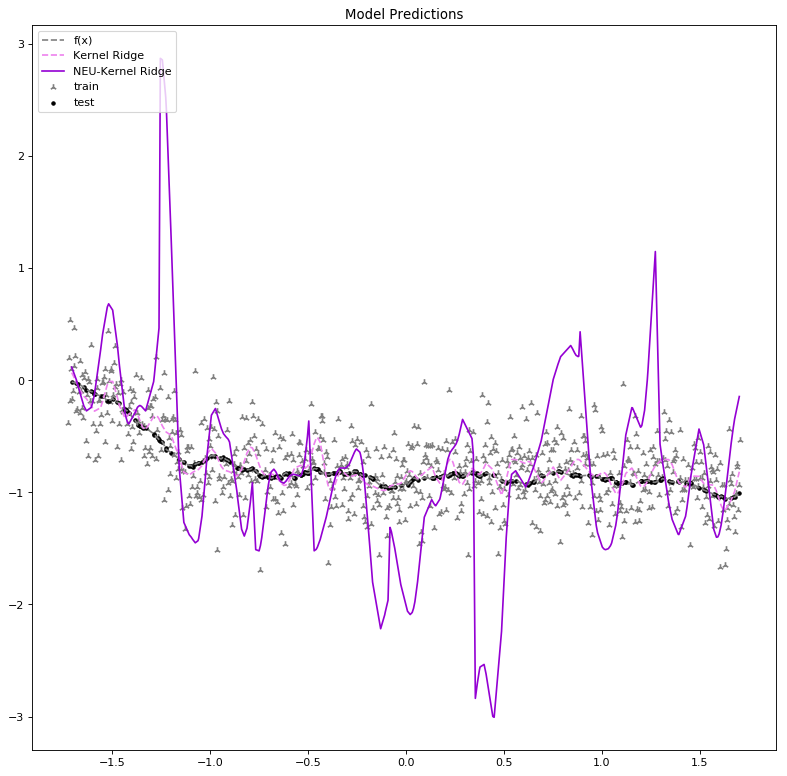

In [16]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Kernel_Ridge.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

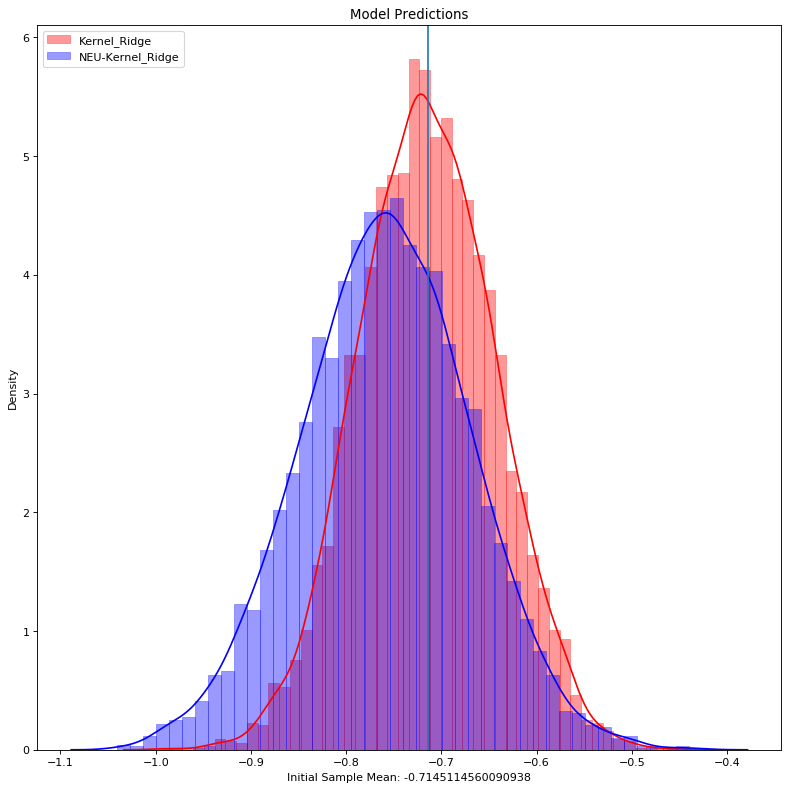

In [17]:
get_Error_distribution_plots(data_y_test,f_hat_kernel_ridge_test,NEU_KReg_y_hat_test,"Kernel_Ridge")

#### Numerical Comparison between the Kernel Ridge regressor and NEU-Kernel Ridge regressor models:

In [18]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

Kernel Ridge-Performance:
               Train       Test
Er. 95L    -0.018514  -0.036760
Er. Mean   -0.000019  -0.025203
Er. 95U     0.018519  -0.013936
MAE         0.206413   0.075238
MSE         0.066863   0.009047
MAPE      122.434206  26.608374
NEU-Kernel Ridge-Performance:
              Train        Test
Er. 95L   -0.017589   -0.079021
Er. Mean  -0.000026    0.019170
Er. 95U    0.017682    0.113559
MAE        0.197558    0.513084
MSE        0.061320    0.596454
MAPE      72.081638  700.442307


## Tree Model(s):
*Naturally, all of these have a decoupled implementation*.

In [19]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_GBRF_y_hat_train_pre,NEU_GBRF_y_hat_test_pre, GBRF_w_NEU_features = get_GBRF(X_train = data_x_featured_train,
                                                                                 X_test = data_x_featured_test,
                                                                                 y_train = data_y)

NEU_GBRF_y_hat_train = NEU_GBRF_y_hat_train_pre
NEU_GBRF_y_hat_test = NEU_GBRF_y_hat_test_pre

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    1.6s finished


#### Visual Comaprison between the GBRF and the NEU-GBRF models:

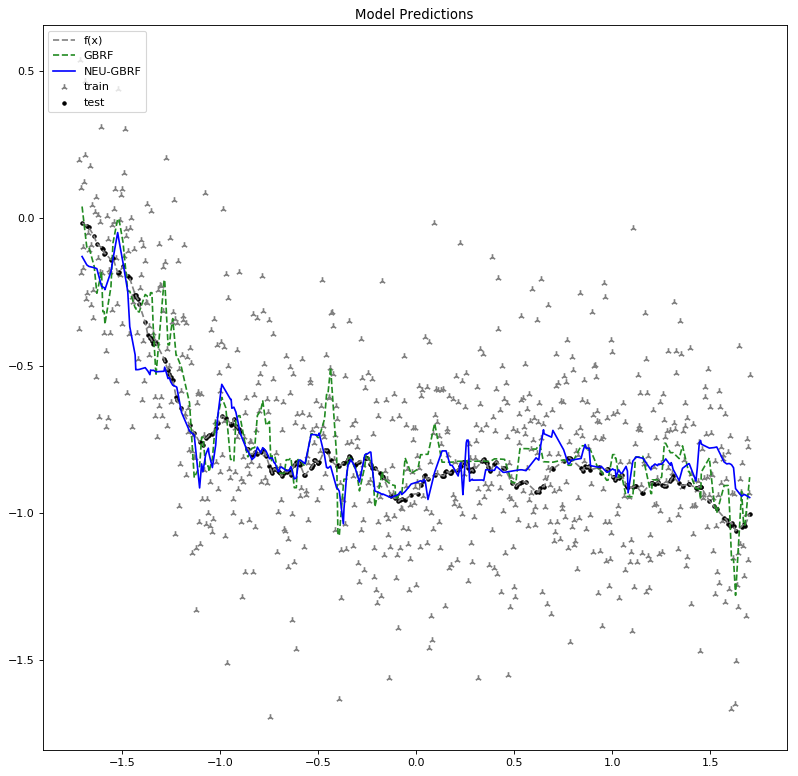

In [20]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, linestyle="--", color = 'forestgreen', label='GBRF')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'blue',label='NEU-GBRF')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")


# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/GBRF.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

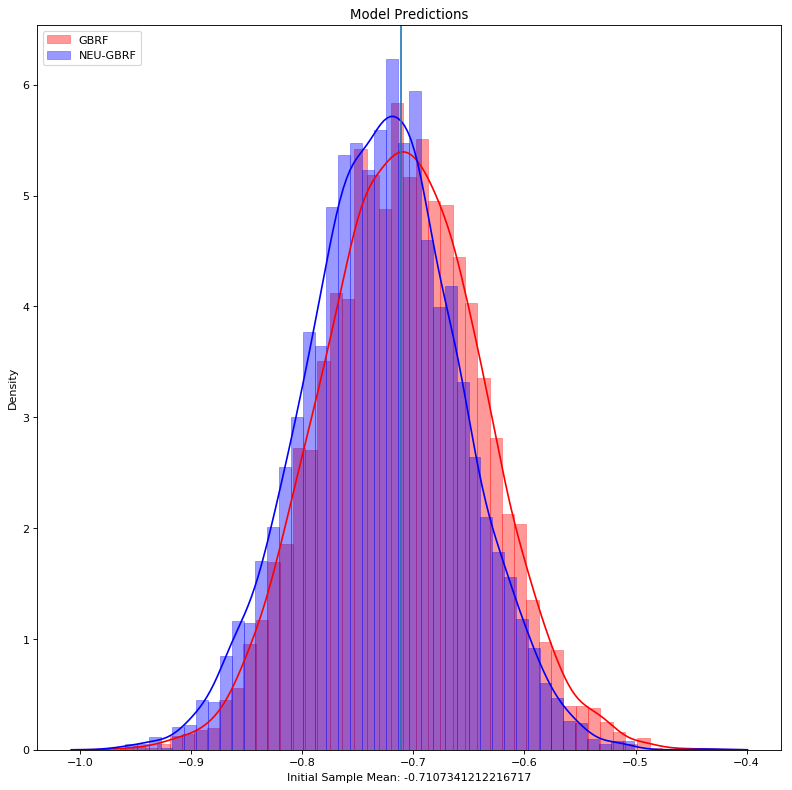

In [21]:
get_Error_distribution_plots(data_y_test,GBRF_y_hat_test,NEU_GBRF_y_hat_test,"GBRF")

#### Numerical Comparison between the GBRF and NEU-GBRF models:

In [22]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

GBRF-Performance:
                 Train       Test
Er. 95L  -1.688810e-02  -0.039980
Er. Mean  8.422892e-17  -0.028981
Er. 95U   1.663780e-02  -0.018411
MAE       1.868486e-01   0.068702
MSE       5.637248e-02   0.008336
MAPE      9.052234e+01  70.653736
NEU-GBRF-Performance:
                 Train       Test
Er. 95L  -1.637380e-02  -0.022899
Er. Mean -5.980401e-17  -0.012656
Er. 95U   1.647489e-02  -0.002634
MAE       1.778824e-01   0.063178
MSE       5.114959e-02   0.007105
MAPE      3.379509e+02  11.979391


---
## Neural Networks: 
---
### NEU-ffNN

#### A) Fully-Coupled Implementation
- Train feature-map + ffNN ($\hat{f}\circ \phi$) in one go.

In [23]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN_w_feature_only(n_folds = CV_folds, 
                                                                          n_jobs = n_jobs, 
                                                                          n_iter = n_iter, 
                                                                          param_grid_in = param_grid_NEU_Nets, 
                                                                          X_train = data_x, 
                                                                          y_train = data_y,
                                                                          X_test = data_x_test)

Training NEU-ffNN (Fully Coupled)
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   12.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   12.2s finished


Epoch 1/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7865 - mse: 0.6827 - mae: 0.7538 - mape: 102.6680
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.7391 - mse: 0.6109 - mae: 0.7093 - mape: 97.2262
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6635 - mse: 0.5036 - mae: 0.6362 - mape: 91.5572
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.5411 - mse: 0.3574 - mae: 0.5141 - mape: 80.1959
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.4212 - mse: 0.2387 - mae: 0.3986 - mape: 98.4261
Epoch 6/50
94/94 [==============================] - 0s 1ms/step - loss: 0.3476 - mse: 0.1663 - mae: 0.3308 - mape: 219.0126
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: 0.3138 - mse: 0.1381 - mae: 0.3004 - mape: 306.9258
Epoch 8/50
94/94 [==============================] - 0s 2ms/step - loss: 0.2996 - mse: 0.1264 - mae: 0.2866 - mape: 302.5625
Epoch 9/50
9

---

**Note:** The following two models are purely out of personal curiosity and are not included in the paper.  Feel free to use them, they perform well. 

---

## Visualization

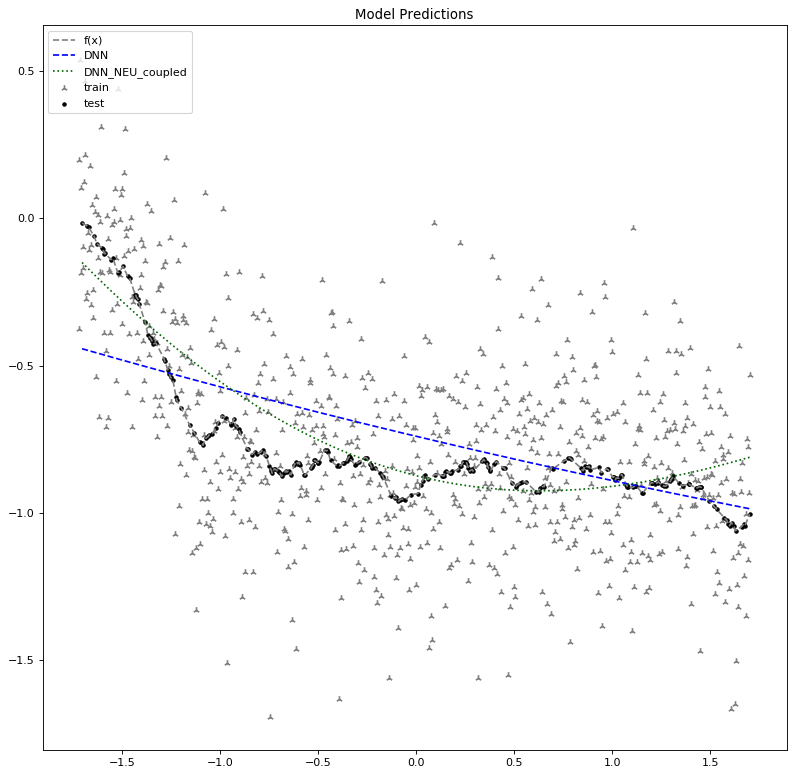

In [24]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'blue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'darkgreen',label='DNN_NEU_coupled')



# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Neural_Network_Models.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

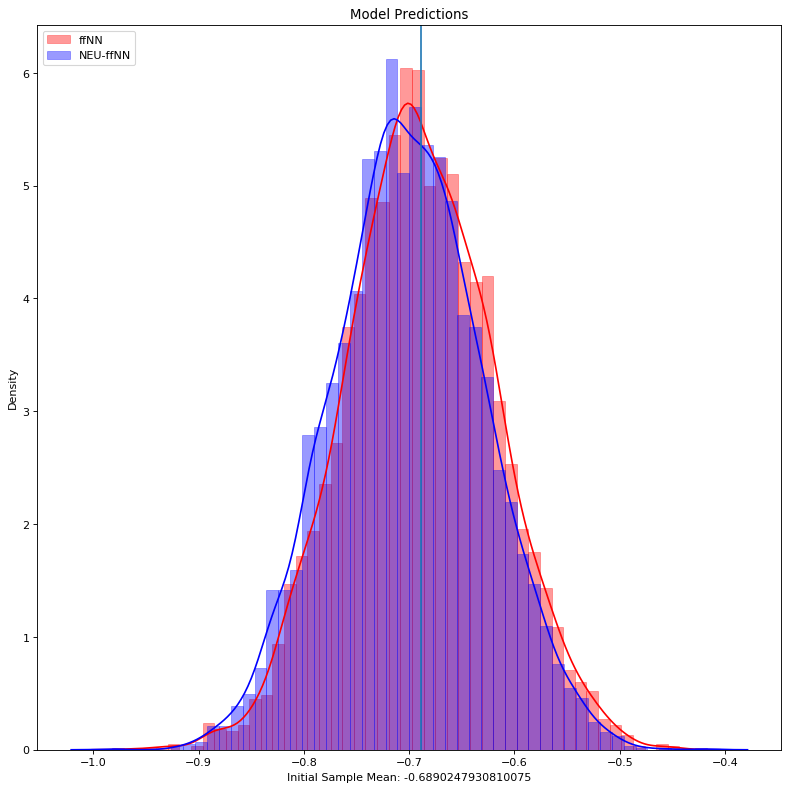

In [25]:
get_Error_distribution_plots(data_y_test,ffNN_y_hat_test,NEU_ffNN_y_hat_test,"ffNN")

---
---
---

---
# Result(s)
---

## Generate Results Table(s):

In [26]:
#=========#
# Testing #
#=========#
test_performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,0],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,0],
                                   "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train_FC,NEU_OLS_y_hat_test_FC,data_y,data_y_test).iloc[:,0],
                                   "NEU-ENET": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,0]}).transpose()


test_performance.to_latex("./outputs/tables/Test_performance.tex")

#==========#
# Training #
#==========#
train__performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,1],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,1],
                                   "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train_FC,NEU_OLS_y_hat_test_FC,data_y,data_y_test).iloc[:,1],
                                   "NEU-ENET": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,1]}).transpose()

train__performance.to_latex("./outputs/tables/Train_performance.tex")

# Visualize Predictions

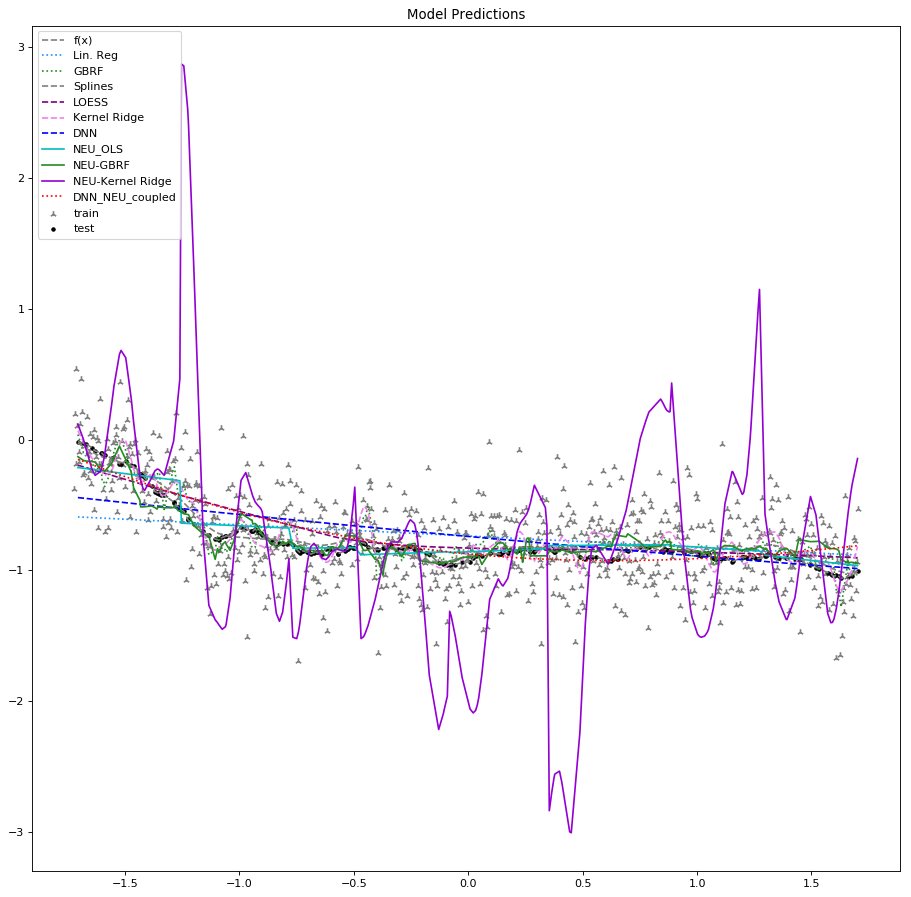

In [27]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, color = 'forestgreen',linestyle=":", label='GBRF')
# Plot Non-Linar Benchmark(s): Classical
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_smoothing_splines_test,color='grey',linestyle="--",label='Splines')
plt.plot(np.array(data_x_test_raw).reshape(-1,),LOESS_prediction_test,color='purple',linestyle="--",label='LOESS')
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'blue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU_OLS')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'red',label='DNN_NEU_coupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Full_Picture.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

 ---

## Performance Report
- First, we print the comparison tables (so it can be viewed from the command-line if it is being run live on a grid/cluster/remotely).
- Second, we display the training and testing performances in clean dataframes.

In [28]:
#--------------------#
# Classical Model(s) #
#--------------------#
# OLS Performance
print("OLS-Performance:")
# print(reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test))

# NEU-OLS Performance
print("NEU-OLS-Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

OLS-Performance:
NEU-OLS-Performance:
                 Train       Test
Er. 95L  -2.033884e-02  -0.034377
Er. Mean -9.514708e-08  -0.026313
Er. 95U   1.991075e-02  -0.017914
MAE       2.247050e-01   0.055663
MSE       7.823934e-02   0.005029
MAPE      4.934348e+01  10.665325


In [29]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

Kernel Ridge-Performance:
               Train       Test
Er. 95L    -0.018083  -0.036754
Er. Mean   -0.000019  -0.025203
Er. 95U     0.018518  -0.013825
MAE         0.206413   0.075238
MSE         0.066863   0.009047
MAPE      122.434206  26.608374
NEU-Kernel Ridge-Performance:
              Train        Test
Er. 95L   -0.017882   -0.076622
Er. Mean  -0.000026    0.019170
Er. 95U    0.017841    0.112058
MAE        0.197558    0.513084
MSE        0.061320    0.596454
MAPE      72.081638  700.442307


In [30]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

GBRF-Performance:
                 Train       Test
Er. 95L  -1.737034e-02  -0.039507
Er. Mean  8.422892e-17  -0.028981
Er. 95U   1.701360e-02  -0.018286
MAE       1.868486e-01   0.068702
MSE       5.637248e-02   0.008336
MAPE      9.052234e+01  70.653736
NEU-GBRF-Performance:
                 Train       Test
Er. 95L  -1.616693e-02  -0.022575
Er. Mean -5.980401e-17  -0.012656
Er. 95U   1.600989e-02  -0.002285
MAE       1.778824e-01   0.063178
MSE       5.114959e-02   0.007105
MAPE      3.379509e+02  11.979391


In [31]:
#-----------------------------------------------------#
# Classical Non-Linear Univariate Regression Model(s) #
#-----------------------------------------------------#
# Splines Performance
print("Splines-Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# Loess Performance
print("LOESS Performance:")
print(reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test))

Splines-Performance:
                 Train      Test
Er. 95L  -2.037320e-02 -0.035641
Er. Mean  2.967996e-15 -0.030478
Er. 95U   1.982197e-02 -0.025217
MAE       2.178920e-01  0.044089
MSE       7.450087e-02  0.002661
MAPE      6.021357e+01  7.317116
LOESS Performance:
              Train       Test
Er. 95L   -0.039355  -0.063454
Er. Mean  -0.018600  -0.052924
Er. 95U    0.001544  -0.042157
MAE        0.232086   0.076585
MSE        0.083863   0.009968
MAPE      38.054356  14.044431


In [32]:
#--------------#
# DNN Model(s) #
#--------------#
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN (Coupled) Performance:") #Readout Form!
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))

# print("NEU-ffNN (Decoupled) Performance:")
# print(reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test))

ffNN-Performance:
              Train       Test
Er. 95L   -0.027735  -0.067892
Er. Mean  -0.005272  -0.050690
Er. 95U    0.017569  -0.032738
MAE        0.252818   0.121272
MSE        0.098684   0.023511
MAPE      37.671001  19.826642
NEU-ffNN (Coupled) Performance:
              Train       Test
Er. 95L   -0.023742  -0.050226
Er. Mean  -0.001891  -0.038100
Er. 95U    0.019267  -0.026121
MAE        0.234584   0.083859
MSE        0.086306   0.011170
MAPE      38.801804  14.744789


# Report

## Re-Summarize Learning Problem for easy recap :)

In [33]:
print("Simulation Confiugration Information:")
print(" ")
print("=========================================================================================================================================================")
print(the_facts)
print("=========================================================================================================================================================")
print(" ")

Simulation Confiugration Information:
 
We're plotting the function: rough with 0.25 additive noise, a distortion/model uncertainty level of 0.25, and an out-of sample window on either side of the input space of: 0.001.  We train using 1000 datapoints and have a test set conisting of 0.75% percent of the total generated data.
 


## Train-Set Performance

In [34]:
train__performance

,Er. 95L,Er. Mean,Er. 95U,MAE,MSE,MAPE
Smoothin Splines,-0.035656,-0.030478,-0.025235,0.044089,0.002661,7.317116
LOESS,-0.063450,-0.052924,-0.042421,0.076585,0.009968,14.044431
Elastic Net,-0.063264,-0.043348,-0.021932,0.136609,0.030881,19.903608
NEU-OLS,-0.052730,-0.043809,-0.034884,0.067189,0.007102,13.596044
NEU-ENET,-0.034453,-0.026313,-0.017967,0.055663,0.005029,10.665325
Kernel,-0.036972,-0.025203,-0.014044,0.075238,0.009047,26.608374
NEU-KerRidge,-0.076408,0.019170,0.112929,0.513084,0.596454,700.442307
GBRF,-0.040025,-0.028981,-0.018162,0.068702,0.008336,70.653736
NEU-GBRF,-0.022786,-0.012656,-0.002318,0.063178,0.007105,11.979391
ffNN,-0.068231,-0.050690,-0.032254,0.121272,0.023511,19.826642


## Test-Set Performance

In [35]:
test_performance

,Er. 95L,Er. Mean,Er. 95U,MAE,MSE,MAPE
Smoothin Splines,-0.019062,2.967996e-15,0.019706,0.217892,0.074501,60.213571
LOESS,-0.039019,-1.859982e-02,0.001905,0.232086,0.083863,38.054356
Elastic Net,-0.023366,1.894781e-17,0.024451,0.259771,0.107694,36.640111
NEU-OLS,-0.019888,-2.813923e-04,0.019290,0.220905,0.076321,43.236558
NEU-ENET,-0.020398,-9.514708e-08,0.019422,0.224705,0.078239,49.343478
Kernel,-0.018584,-1.895662e-05,0.018400,0.206413,0.066863,122.434206
NEU-KerRidge,-0.017429,-2.593362e-05,0.018001,0.197558,0.061320,72.081638
GBRF,-0.016766,8.422892e-17,0.016759,0.186849,0.056372,90.522339
NEU-GBRF,-0.015979,-5.980401e-17,0.016753,0.177882,0.051150,337.950940
ffNN,-0.027854,-5.272021e-03,0.017284,0.252818,0.098684,37.671001


#### The END

---